# **Task 3 (3.0 points): Decision Trees**

### **Connect to the drive**



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Import libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

### **Code For Task 3**

In [4]:
# Load the dataset
data = pd.read_csv('dt_data.csv')

# Clean the dataset
data = data.drop(columns=['Unnamed: 11']).dropna()

# Define entropy function
def entropy(target_col):
    _, freq = np.unique(target_col, return_counts=True)
    probabilities = freq / float(freq.sum())
    return -np.sum(probabilities * np.log2(probabilities))

# Define average entropy function
def avg_entropy(data, feature):
    unique_vals = data[feature].unique()
    total_entropy = 0
    for val in unique_vals:
        partition = data[data[feature] == val]
        partition_entropy = entropy(partition['Rank'])
        total_entropy += (len(partition) / len(data)) * partition_entropy
    return total_entropy

# Define information gain function
def information_gain(data, feature):
    total_entropy = entropy(data['Rank'])
    return total_entropy - avg_entropy(data, feature)

# Function to prompt user for attribute and calculate entropy, average entropy, and information gain
def calculate_entropies_and_gain(data):
    try:
        attribute = input("Enter the name of the score attribute (Q1 to Q9): ")
        if attribute not in data.columns:
            raise ValueError("Invalid attribute name. Please choose from Q1 to Q9.")

        h = entropy(data['Rank'])
        ae = avg_entropy(data, attribute)
        ig = information_gain(data, attribute)

        print(f"Entropy (H) of 'Rank': {h}")
        print(f"Average Entropy (AE) of '{attribute}': {ae}")
        print(f"Information Gain (IG) of '{attribute}': {ig}")
    except ValueError as e:
        print(e)

# Function to prepare and train the Decision Tree Classifier
def prepare_and_train_model(data):
    X = data.drop(['Rank', '#'], axis=1)
    y = data['Rank']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    dt_classifier = DecisionTreeClassifier(random_state=42)
    dt_classifier.fit(X_train, y_train)

    return dt_classifier, X_test, y_test

# Define evaluation function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

# Define function to visualize the Decision Tree
def show_decision_tree(model, feature_names):
    plt.figure(figsize=(12, 8))
    plot_tree(model, filled=True, feature_names=feature_names, class_names=model.classes_)
    plt.show()

### **Run** **task 3**

In [5]:
# Calculate entropies and information gain
calculate_entropies_and_gain(data)

# Prepare and train the model
dt_classifier, X_test, y_test = prepare_and_train_model(data)

# Evaluate the model
evaluate_model(dt_classifier, X_test, y_test)

Enter the name of the score attribute (Q1 to Q9): Q7
Entropy (H) of 'Rank': 0.9219957030944406
Average Entropy (AE) of 'Q7': 0.8150839597380262
Information Gain (IG) of 'Q7': 0.1069117433564144
              precision    recall  f1-score   support

           F       0.52      0.50      0.51        30
           P       0.71      0.73      0.72        51

    accuracy                           0.64        81
   macro avg       0.61      0.61      0.61        81
weighted avg       0.64      0.64      0.64        81



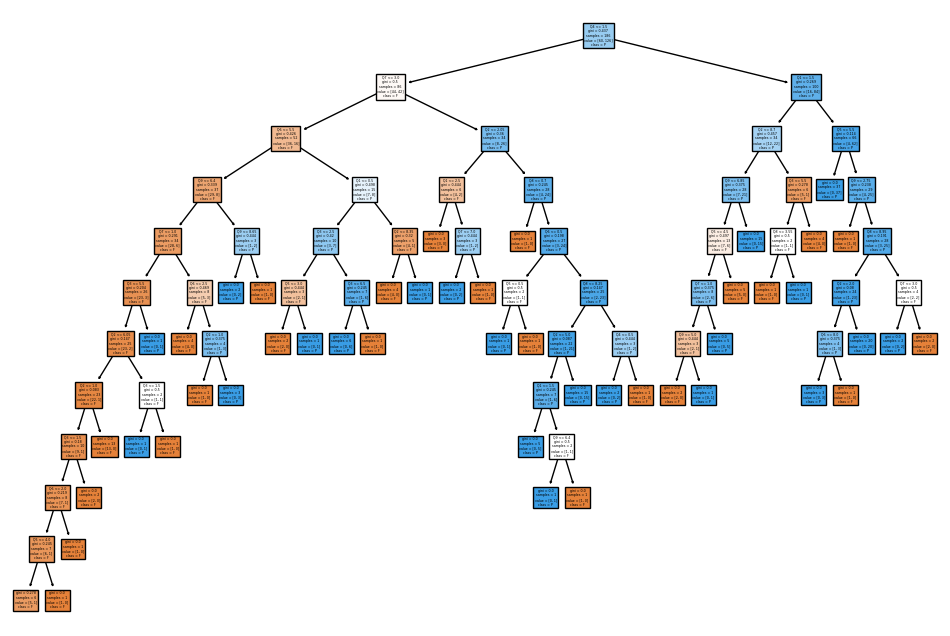

In [6]:
# Show the Decision Tree
show_decision_tree(dt_classifier, data.drop(['Rank', '#'], axis=1).columns)